In [385]:
import pandas as pd
import numpy as np

# Loading Data as a Dataframe

In [355]:
df1 = pd.read_csv('daily-total-female-births-CA.csv')

###### First five records

In [356]:
df1.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


###### Data Type

In [357]:
df1['date'].dtype

dtype('O')

In [358]:
df1.dtypes

date      object
births     int64
dtype: object

date is of the type Object(String)

##### Loading data with parse_dates

In [359]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

In [360]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [361]:
df2['date'].dtype

dtype('<M8[ns]')

In [362]:
df2.dtypes

date      datetime64[ns]
births             int64
dtype: object

Now the format of "date" has changed to datetime64

# Loading Data as a Series

In [363]:
Series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0 ,squeeze=True)

- "date" column is the index of this Series
- To convert the dataframe into Series, I have written "squeeze=True"

In [364]:
Series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

###### Notice: 
- The Series name is births.
- There are no individual columns names

In [365]:
df2.shape

(365, 2)

In [366]:
Series.shape

(365,)

You cannot have more than one column in the Series.

#### Subsetting Dataframe - Querying By Time

In [367]:
df2[(df2['date'] >= '1959-01-01') & (df2['date'] <= '1959-01-31')]

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


##### Subsetting Series - Querying By Time

In [368]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


##### Descriptive Statistics

In [369]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [370]:
Series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

# Time Series - Data Visualization

In [371]:
from matplotlib import pyplot as plt
%matplotlib inline

In [372]:
Data = df2.copy()

In [373]:
Data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


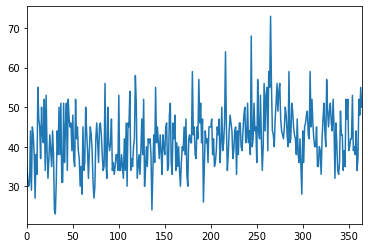

In [374]:
Data['births'].plot()

Notice: 
- Indexes are ranging from 0,1,2,3 and so on.
- Let's have Date on X axis

In [375]:
#Change the value of indexes to date
Data.index = Data['date'] 

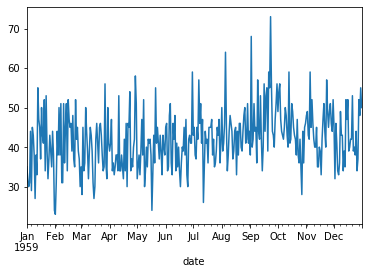

In [376]:
Data['births'].plot()

Now let's create the same plot using Series

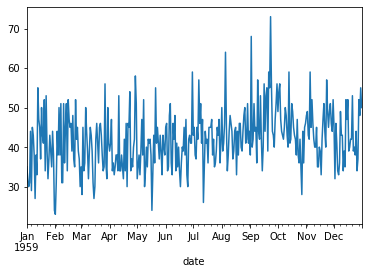

In [377]:
Series.plot()

### Zooming In

- It is difficult to understand the pattern for 365 days as the values are clumped up. 
- Let us focus on a particular time peried by creating a subset

In [380]:
Data_Zoom = Data[(Data['date'] >= '1959-01-01') & (Data['date'] <= '1959-01-31')].copy()

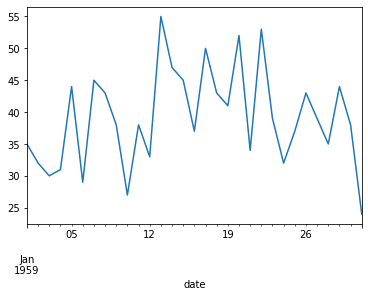

In [381]:
Data_Zoom['births'].plot()

Now let's Zoom in the same plot using Series

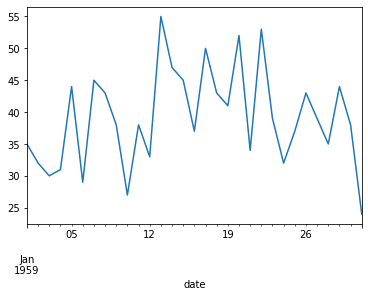

In [382]:
Series['1959-01'].plot()

### Trendline

In [386]:
import seaborn as sns

In [390]:
Data.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [391]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


We will be using index values instead of date values in X axis because for Scatter plot we need numeric data.

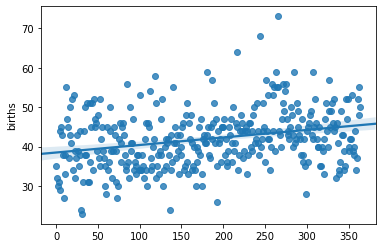

In [392]:
sns.regplot(x= df2.index.values, y=df2['births'])

There is Regression Line or Trend Line plotted in the above graph. We can see that there is a positive trend in the data as the slope of the line is positive.


We can add an "order = 2" parameter to plot the Quadratic Trendline.

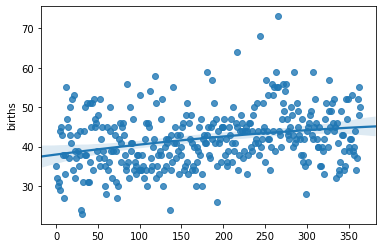

In [393]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

#### On Average Number of births are increasing with months.